# Turing Machine

In this session, we are going to code a machine for the given state diagram.

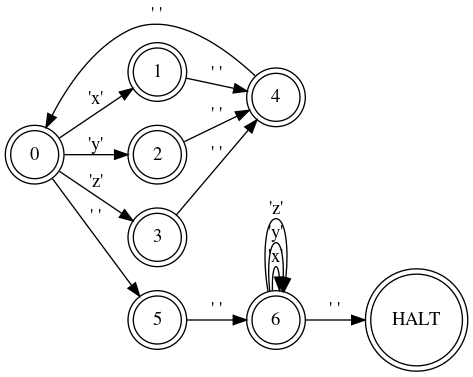

In [1]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/tiago-santos-ulus/ai_2020/master/assets/turing_machine_state_diagram.png')

In the above image, we can see that the machine has 8 nodes:
- 0
- 1
- 2
- 3
- 4
- 5
- 6
- HALT

All the nodes, except the *HALT* node, are transiction nodes - nodes where the machine is still active.
The *HALT* node is a terminal node - once the machine is in this node, the machine is no longer active.

### So, how does the machine transictions from one node to another?

To do this, the machine needs to be active by reading characteres. These characteres are read from a tape.
You can imagine a tape of being a list with elements of an alphabet.

In this example, as you can see in the states diagram, the alphabet is:
- ' ': empty string
- 'x': the *x* character
- 'y': the *y* character
- 'z': the *z* character

Given this alphabet, an example of a valid tape for the transictions of the states can be:
```python

example_tape = ['','x','','','y','z','','y','','']

```

Everytime there is a transiction (an edge of the graph in the states diagram) there is also an associated action. 
The actions will be written in a given position of the tape


### Working with the tape

If the machine is reading a given character in the tape in a specific node of the machine, this means that the current state of the machine is:
- The current node of the machine
- The current position of the tape (where the machine is reading the current character)

On each transiction, we can to operations on the tape. For example:
- Each time we move, we can write a new character (that exists in the alphabet) in the current tape position
- We can move left on the tape (decrement the current position in one unit)
- We can move right on the tape (increment the current position in one unit)
- (The tape has limits - you can't move left when you are in position 0, and you can move right when you are at the end of the tape)


As an example, the set of actions for each transition is the following:

- Node 0, read character ' ': write ' ' in the current tape position and move left on the tape, transitioning to node 5
- Node 1, read character ' ': wirte 'x' in the current tape position and move right on the tape, transitioning to node 4


These two transitions could be enconded in a list, where the positions would enconde:
0. Starting Node
1. Character that was read
2. Character to be written in the tape
3. Moviment orientation on the tape (L for left, R for right)
5. The Node to which the machine transits

The program to compress the two instructions above given this encoding, would be a list with two intructions (which thenself are being enconded as a list):

```python

example_program = [
    ['0', ' ', ' ', 'L', '5'],
    ['1', ' ', 'x', 'R', '4']
]

```

### Summing up
In this exercise, you need to create a machine that consumes a program enconded as the `example_program`.

## The Exercise

In this exercise, you are going to program a turing machine that runs the following program:

In [2]:
program = [
    ['0', ' ', ' ', 'L', '5'],
    ['0', 'x', ' ', 'L', '1'],
    ['0', 'y', ' ', 'L', '2'],
    ['0', 'z', ' ', 'L', '3'],
    ['1', ' ', 'x', 'R', '4'],
    ['2', ' ', 'y', 'R', '4'],
    ['3', ' ', 'z', 'R', '4'],
    ['4', ' ', ' ', 'R', '0'],
    ['5', ' ', ' ', 'L', '6'],
    ['6', ' ', ' ', 'R', 'HALT '],
    ['6', 'x', 'x', 'L', '6'],
    ['6', 'y', 'y', 'L', '6'],
    ['6', 'z', 'z', 'L', '6']
]

To do this, let's breakdown the problem in smaller parts - that are in the cells bellow.

In [3]:
from typing import List

In [4]:
def updateTape(
    tape: List[str],
    pos: int,
    wrt: str
) -> List[str]:
    """
    @params
    - tape: A list of string, containing elements of the alphabet.
            An example of this would be [' ', 'x', 'y', 'z',  ' ', ' ', ' ']
    - pos:  An integer representing the position of the list to be write on.
            Take into consideration that this can be any value, and therefore
            you should make sure that the value in `pos` is a valid one.
    - wrt:  The character to be written in the position `pos` of the `tape`

    @description
    This function receives a `tape`, and writes the 
    character `wrt` in the position `pos` of the tape.

    @returns
    This function returns the tape with the character `wrt` written in the position `pos`
    """
    ...

In [5]:
# To make sure the function runs as expected
example_tape = [' ', 'x', 'y']
example_tape_outcome_1 = updateTape(example_tape, 0, 'y')

assert example_tape_outcome_1 == ['y','x','y']

AssertionError: 

In [6]:
def updateMachine(
    machine: List,
    tape: List[str],
    mv: str,
    newstate: str
) -> List:
    """
    @params
    - machine:  A list with two elements. Element 0 is the position
                of the tape, while element 1 is the current node state.
                Recall the node states from the image at the beggining of this document.
                An example argument would be `[2, '4']`
    - tape:     A list of string, containing elements of the alphabet.
                An example of this would be [' ', 'x', 'y', 'z',  ' ', ' ', ' ']
    - mv:       One of the following characteres: 'L','R'. 'L' indicates to move left,
                while 'R' indicates to move right.
    - newstate: A string representing the node to which the machine will update.
                From the program, the only possible values are:
                '0', '1', '2', '3', '4', '5', '6', 'HALT'
    
    @description
    This function updates the machine state. The machine is represented
    by the parameter `machine`. The machine is update on tape position and
    node state (which position of the tape is it in, and in which node).
    
    @returns
    This function returns the updated machine state
    """
    ...

In [7]:
def executeStep(
    machine: List,
    tape: List,
    program: List[List[str]]
) -> List:
    """
    @params
    - machine:  A list with two elements. Element 0 is the position
                of the tape, while element 1 is the current node state.
                Recall the node states from the image at the beggining of this document.
                An example argument would be `[2, '4']`
    - tape:     A list of string, containing elements of the alphabet.
                An example of this would be [' ', 'x', 'y', 'z',  ' ', ' ', ' ']
    - program:  This is the representation of a program, which we did in the
                begginig of this sections. 
    
    @description
    This function is responsible for understanding the current state of the machine
    (the state is encoded is the parameter `machine` as a List with two elements).
    Once the functions understands the current state, it has to apply the correct transiction 
    that is encoded in the program - writting the character in the tape, change the position of
    the tape and move to the new node.
    
    @returns
    This function returns a List with two elements: Element 0 is the machine state, and element 1 is
    the changed tape.
    """
    ...
    return [[],[]]

In [8]:
def runMachine(
    machine: List,
    tape: List[str],
    program: List[List[str]]
) -> None:
    """
    @params
    - machine:  A list with two elements. Element 0 is the position
                of the tape, while element 1 is the current node state.
                This will be the initial state of the machine.
                An example argument would be `[2, '4']`
    - tape:     A list of string, containing elements of the alphabet.
                An example of this would be [' ', 'x', 'y', 'z',  ' ', ' ', ' ']
    - program:  This is the representation of a program, which we did in the
                begginig of this sections. 
    
    @description
    This is the main function. This function receives the initial machine state 
    (in the paremeter `machine`), and the initial state of the tape.
    The function will apply the program while the state of the machine reaches to
    node 'HALT'.
    """
    current_machine_state = machine
    current_tape_state = tape
    current_iteration = 1
    while machine[1] != 'HALT' and current_iteration < 40:
        print(f'Iteration {current_iteration}: \n\tTape State: {current_tape_state}\n\tCurrent Node: {machine[0]}')
        next_machine_state, next_tape_state = executeStep(
            current_machine_state,
            current_tape_state,
            program
        )
        current_iteration += 1
        ...

In [9]:
initial_machine_state = [
    3, #we start in the index 3 of the tape
    '0' #we start in node '0'
]

initial_tape = [' ',' ',' ','x','x','y','z','z',' ',' ',' ',' ']

runMachine(
    initial_machine_state,
    initial_tape,
    program
)

Iteration 1: 
	Tape State: [' ', ' ', ' ', 'x', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' ']
	Current Node: 3
Iteration 2: 
	Tape State: [' ', ' ', ' ', 'x', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' ']
	Current Node: 3
Iteration 3: 
	Tape State: [' ', ' ', ' ', 'x', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' ']
	Current Node: 3
Iteration 4: 
	Tape State: [' ', ' ', ' ', 'x', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' ']
	Current Node: 3
Iteration 5: 
	Tape State: [' ', ' ', ' ', 'x', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' ']
	Current Node: 3
Iteration 6: 
	Tape State: [' ', ' ', ' ', 'x', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' ']
	Current Node: 3
Iteration 7: 
	Tape State: [' ', ' ', ' ', 'x', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' ']
	Current Node: 3
Iteration 8: 
	Tape State: [' ', ' ', ' ', 'x', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' ']
	Current Node: 3
Iteration 9: 
	Tape State: [' ', ' ', ' ', 'x', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' ']
	Current Node: 3
Iteration 10: 
	Tape State: [' ', ' ', ' ', 'x', 'x', '